In [1]:
import openml
from gplearn.genetic import SymbolicTransformer, SymbolicRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = openml.datasets.get_dataset(1029)

X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

X.head()

,In1,In2,In3,In4
0,4,2,3,0
1,3,3,0,3
2,2,4,1,0
3,2,1,2,3
4,2,3,4,2


In [3]:
y.head()

0    3
1    3
2    2
3    2
4    2
Name: Out1, dtype: uint8

In [4]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
transformer = SymbolicTransformer(generations=20,
                                  population_size=6000,
                                  hall_of_fame=100,
                                  n_components=8,
                                  function_set=function_set,
                                  parsimony_coefficient=0.0001,
                                  max_samples=0.3,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=-1)

transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.75          0.23125        7         0.735217         0.672969     31.58s
   1    11.66         0.452466        6         0.750321         0.633404     44.25s
   2    14.78         0.538287       15         0.807994         0.701469     50.89s
   3    18.43         0.588104       12         0.794158         0.716299     55.87s
   4    21.76         0.628999       64         0.800888         0.729844     55.74s
   5    25.83         0.663776       22         0.822704         0.708286     54.24s
   6    30.41         0.687521       17         0.831888         0.665947     51.55s
   7    34.82         0.690555       53         0.829983         0.699053     46.28s
   8    40.13          0.69892       49         0.840332         0.706238  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.3, n_components=5, n_jobs=-1,
                    parsimony_coefficient=0.0001, population_size=6000,
                    random_state=42, verbose=1)

In [5]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8
0,4.0,2.0,3.0,0.0,50.216391,11.832682,17.000000,32.959760,35.0
1,3.0,3.0,0.0,3.0,54.669516,13.048157,18.000000,39.303118,33.0
2,2.0,4.0,1.0,0.0,54.942953,12.177590,17.199670,34.454676,31.0
3,2.0,1.0,2.0,3.0,32.942953,9.000000,12.633298,26.868739,25.0
4,2.0,3.0,4.0,2.0,54.942953,15.048157,19.062521,38.454676,39.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
est_gp = SymbolicRegressor(
    population_size=5000,
    generations=20,
    p_crossover=0.6,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.2,
    p_point_mutation=0.1,
    max_samples=0.5,
    function_set=function_set,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.001,
    stopping_criteria=0.01,
    metric='mse',
    n_jobs=-1,
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.82      1.38783e+13       17         0.518918         0.535882     20.94s
   1     8.86          7027.87       42          0.46523         0.618499     32.18s
   2     9.47          10122.2        7         0.411784         0.469064     36.60s
   3    11.43          3487.44        7         0.379124         0.501724     44.80s
   4    11.89          1218.73        9         0.380503          0.51298     37.39s
   5    11.90          5292.62       10         0.345964         0.428886     37.91s
   6    10.89          1547.46       41          0.34022         0.504542     38.86s
   7    10.22           262.87       10         0.354323         0.420526     30.54s
   8     9.65          4037.86       13         0.351459         0.410334  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min'],
                  max_samples=0.5, metric='mse', n_jobs=-1, p_crossover=0.6,
                  p_hoist_mutation=0.2, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=5000, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [8]:
y_pred_train = pd.Series(est_gp.predict(X_train), index=X_train.index)
y_pred_train.head()

541    1.644489
440    2.545785
482    2.396554
422    2.459155
778    1.685301
dtype: float64

In [9]:
y_train.head()

541    0
440    2
482    3
422    2
778    2
Name: Out1, dtype: uint8

In [10]:
y_pred_test = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred_test.head()

521    0.656159
737    2.862591
740    0.939709
660    0.220053
411    2.545785
dtype: float64

In [11]:
y_test.head()

521    1
737    3
740    2
660    1
411    3
Name: Out1, dtype: uint8

In [12]:
print("R2 Score of train samples whit the model: ", est_gp.score(X_train, y_train))
print("R2 Score of test samples whit the model: ", est_gp.score(X_test, y_test))

R2 Score of train samples whit the model:  0.5974664046508875
R2 Score of test samples whit the model:  0.43965363068213925


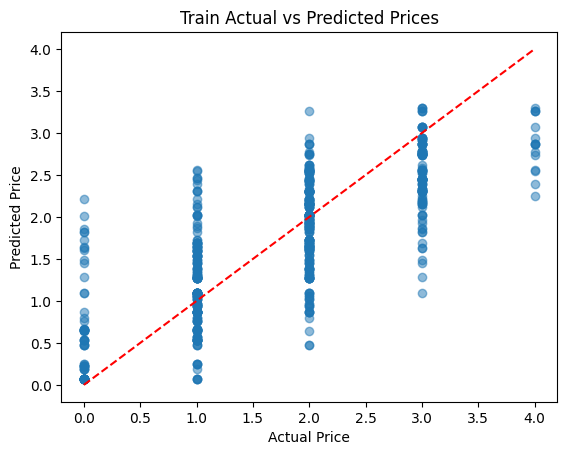

In [13]:
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Train Actual vs Predicted Prices')
plt.show()

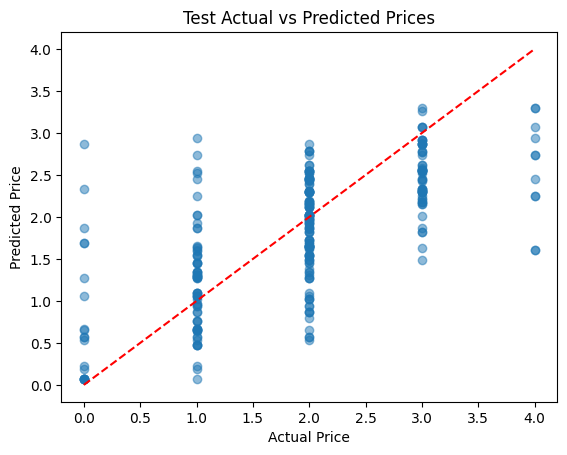

In [14]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual vs Predicted Prices')
plt.show()

In [ ]:
X, y = load_diabetes(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

r = EvolutionaryForestRegressor(max_height=3, normalize=True, select='AutomaticLexicase',
                                gene_num=10, boost_size=100, n_gen=20, n_pop=200, cross_pb=1,
                                base_learner='Random-DT', verbose=True)

r.fit(x_train, y_train)
print(r2_score(y_test, r.predict(x_test)))